In [8]:
import adi
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta

# Initalize SDR

In [9]:
# We are tuning with the CIRBE signal offset tuned 500KHz in the USB

sample_rate = 2e6 # Hz
center_freq = 2.4015e9
num_samps = 10000 # number of samples returned per call to rx()

sdr = adi.Pluto('ip:192.168.2.1')
sdr.gain_control_mode_chan0 = 'manual'
sdr.rx_hardwaregain_chan0 = 70.0 # dB
sdr.rx_lo = int(center_freq)
sdr.sample_rate = int(sample_rate)
sdr.rx_rf_bandwidth = int(sample_rate) # filter width, just set it to the same as sample rate for now
sdr.rx_buffer_size = num_samps

# Record data to file

In [10]:
filename = 'test.iq'

In [11]:
end_time = datetime.now() + timedelta(seconds=10)
with open(filename, 'wb') as f:
    while datetime.now() < end_time:
        data = sdr.rx().astype(np.csingle)
        f.write(data.tobytes())

# Read Data Back and Plot

In [12]:
with open(filename, 'rb') as f:
    data = np.frombuffer(f.read(), dtype=np.csingle)

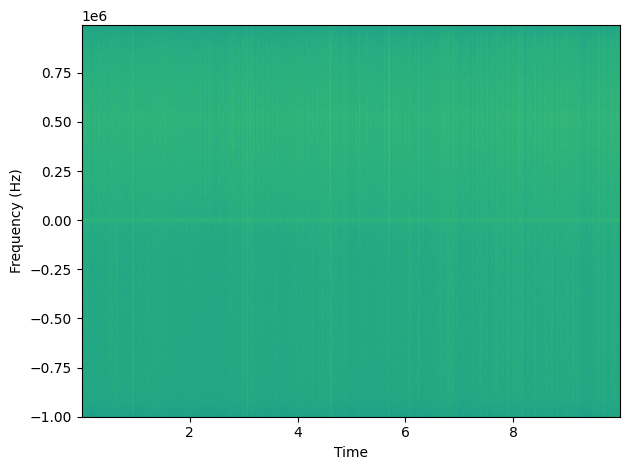

In [13]:
plt.figure()
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
Pxx, freqs, bins, im = plt.gca().specgram(data, NFFT=256, Fs=sample_rate, noverlap=10)
plt.tight_layout()